In [1]:
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys 
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import csv

In [2]:
# ÌÅ¨Î°¨ÎìúÎùºÏù¥Î≤Ñ ÏúÑÏπò ÏÑ§Ï†ï
browser = webdriver.Chrome('../data/chromedriver.exe')

browser.maximize_window()
browser.implicitly_wait(20) #gives an implicit wait for 20 seconds
#navigating to a webpage
browser.get('https://www.instagram.com/explore/tags/%EA%B5%AD%EB%82%B4%EC%97%AC%ED%96%89/')

# make sure the browser stays open for 5sec
sleep(5)

#clean exit

''' # Í∏Ä Í∞ÄÏ†∏Ïò§Îäî Í≤É Ïã§Ìóò
posting = browser.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[2]/div/div[1]/div[1]')
posting.click()
url = browser.current_url 
print(url)
#getfollowedby(url)
contents = browser.find_element_by_class_name('C4VMK')
print(contents.text)
'''

In [3]:
output = []


posting = browser.find_element_by_xpath('//*[@id="react-root"]/section/main/article/div[1]/div/div/div[1]/div[2]')
posting.click()
for i in range(100):
    sleep(1)
    
    try:
        contents = browser.find_element_by_class_name('C4VMK')
        output.append(contents.text)
    except:
        pass
    next_button = browser.find_element_by_xpath('/html/body/div[4]/div[1]/div/div/a[2]')
    next_button.click()
    
close_button = browser.find_element_by_class_name('ckWGn')
close_button.click()


In [4]:

temp = []
temp2 = []

temp = [x.split() for x in output]

for step2 in temp:
    for step3 in step2:
            if (step3[0] == '#'):
                step3 = step3.replace('#', ' ').split()
                for x in step3:
                    temp2.append(x)

temp2


['travel',
 'ig_korea',
 'ig_travel',
 'ig_seoul',
 'iseoulu',
 'travelasia',
 'koreanstyle',
 'visitkorea',
 'daily',
 '10media',
 '10mag',
 'korea',
 'seoul',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'southkorea',
 'instagood\u2060',
 'ÌíçÍ≤ΩÏä§ÌÉÄÍ∑∏Îû®',
 'Íµ¨Î¶Ñ',
 'ÏùºÏÉÅ',
 'Îç∞ÏùºÎ¶¨',
 'Îç∞ÏùºÎ¶¨Í∑∏Îû®',
 'Ï£ºÎßê',
 'Ïù∏Ïä§ÌÉÄÍ∑∏Îû®',
 'ÌôîÏù¥ÌåÖÌïòÏÑ∏Ïöî',
 'ÏÖÄÏπ¥',
 'ÌåîÎ°úÏö∞',
 'Ï¢ãÏïÑÏöî',
 'ÏïÑÎ¶ÑÎã§Ïö¥',
 'Ìä∏ÏúàÌÑ∞ÎÑê',
 'Í≤ΩÎÇ®',
 'Î∞ÄÏñë',
 'Î∞ÄÏñëÏó¨Ìñâ',
 'ÎåÄÌïúÎØºÍµ≠Íµ¨ÏÑùÍµ¨ÏÑù',
 'Î¥âÌôî',
 'ÎπÑÎÇòÎ¶¨ÎßàÏùÑ',
 'Jeju',
 'Ï†úÏ£º',
 'Ìï®ÎçïÏÑúÏö∞Î¥âÌï¥Î≥Ä',
 'Îß•Î¨∏Îèô',
 'Í≤ΩÎ∂Å',
 'ÏÑ±Ï£ºÍµ∞',
 'ÏÑ±Î∞ñÏà≤',
 'ÎåÄÌïúÎØºÍµ≠Íµ¨ÏÑùÍµ¨ÏÑù',
 'ÏÇ¨ÏßÑÎ≥¥Ï†ï',
 'ÏÉâÍ∞ê',
 'travel',
 'ig_korea',
 'ig_travel',
 'ig_seoul',
 'iseoulu',
 'travelasia',
 'koreanstyle',
 'visitkorea',
 'daily',
 '10media',
 '10mag',
 'korea',
 'seoul',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'southkorea',
 'instagood\u2060',
 'city',
 'skyline\u2060',
 'ÌíçÍ≤ΩÏä§ÌÉÄÍ∑∏Îû®',
 'Íµ¨Î¶Ñ',
 'ÏùºÏÉÅ',
 'Îç∞ÏùºÎ¶¨',
 'Îç∞ÏùºÎ¶¨Í∑∏Îû®',
 'Ï£ºÎß

In [5]:
len(temp2)

917

In [6]:
file = open('hashtag.txt', 'w', encoding = 'utf-8')
 
for review in temp2:
    file.write(review+'\n')
    
file.close()


In [7]:
from wordcloud import WordCloud

# Read the whole text.
text = open('hashtag.txt', encoding='utf-8').read()

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", max_words=1000,
                      font_path='C:/Windows/Fonts/NanumGothicCoding.ttf',
                      width=800, height=800).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Gothic"
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 640x480 with 1 Axes>

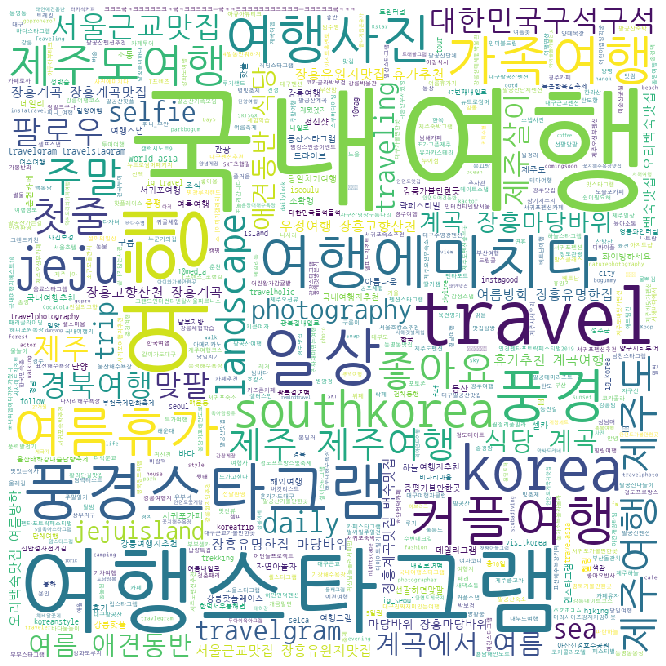

In [8]:
fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")

fig.savefig('wordcloud_without_axisoff.png')


In [9]:
temp2 = ['Î¥âÌôî',
 'ÎπÑÎÇòÎ¶¨ÎßàÏùÑ',
 'Îß•Î¨∏Îèô',
 'Í≤ΩÎ∂Å',
 'ÏÑ±Ï£ºÍµ∞',
 'ÏÑ±Î∞ñÏà≤',
 'ÎåÄÌïúÎØºÍµ≠Íµ¨ÏÑùÍµ¨ÏÑù',
 'Jeju',
 'Ï†úÏ£º',
 'ÏÑúÍ∑ÄÌè¨',
 'Î≥ºÏä§Ïπ¥Ìéò',
 'ÏÇ¨ÏßÑÎ≥¥Ï†ï',
 'ÏÉâÍ∞ê',
 'ÌåîÎ°úÏö∞',
 'ÏÑúÍ∑ÄÎã§Ïõê',
 'Ïò§ÏÑ§Î°ùÌã∞ÎÆ§ÏßÄÏóÑ',
 'Ï†úÏ£º',
 'Ï†úÏ£ºÎØ∏Îãà',
 'Ï†úÏ£ºÎèÑ',
 'Ï†úÏ£ºÎèÑÎØº',
 'Ï†úÏ£ºÏπ¥Ìéò',
 'Ï†úÏ£ºÏó¨Ìñâ',
 'Ï†úÏ£ºÎßõÏßë',
 'Ï†úÏ£ºÎ∞îÎã§',
 'ÏÑúÍ∑ÄÌè¨Ïãú',
 'Ï†úÏ£ºÍ≤åÌïò',
 'ÌûêÎßÅ',
 'Ï†úÏ£ºÌíçÍ≤Ω',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'ÎπÑÏûêÎ¶º',
 'Ï†úÏ£ºÎèÑÏó¨Ìñâ',
 'Ïö∞ÎèÑ',
 'Ï†úÏ£ºÏä§ÎÉÖ',
 'ÏõîÏ†ïÎ¶¨',
 'Ï†úÏ£ºÌïúÎã¨ÏÇ¥Í∏∞',
 'Ï†úÏ£ºÏó¨ÌñâÏΩîÏä§',
 'Ï†úÏ£ºÏãú',
 'Ï§ëÎ¨∏',
 'ÎöúÎ≤ÖÏù¥Ïó¨Ìñâ',
 'Ïï†Ïõî',
 'ÏÇ∞Î∞©ÏÇ∞',
 'ÌòëÏû¨',
 'jejumini',
 'Ïù∏ÏÉùÏÉ∑Î™ÖÏÜå',
 'Ïó¨Ìñâ',
 'Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®',
 'Î≤öÍΩÉ',
 'ÎÇ®Ìï¥Î≤öÍΩÉ',
 'ÏùºÏÉÅ',
 'ÌûêÎßÅ',
 'travel',
 'travelgram',
 'picture',
 'ÏÉÅÏÉÅÏñëÎñºÎ™©Ïû•',
 'ÎÇ®Ìï¥Ïó¨Ìñâ',
 'ÎÇ®Ìï¥Ïó¨ÌñâÏΩîÏä§',
 'Ïù∏ÏÉùÏÉ∑',
 'ÎÇ®Ìï¥',
 'ÎÇ®Ìï¥ÏñëÎñºÎ™©Ïû•',
 'ÎÇ®Ìï¥Í∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 'ÎÇ®Ìï¥Ìï´Ìîå',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Í≤ΩÎÇ®Ïó¨Ìñâ',
 'Í≤ΩÏÉÅÎèÑÏó¨Ìñâ',
 'Ïõ®Îî©Ï¥¨ÏòÅ',
 'Ïä§ÎÖ∏Ïö∞ÍøÄÏûº',
 'Í∏∏Î∞îÎã•ÏóêÏÑú',
 'Ïò•Í≥ÑÌï¥Î≥Ä',
 'Ï†ïÎèôÏßÑÏó¨Ìñâ',
 'ÎèôÌï¥Ïó¨Ìñâ',
 'ÏπúÏ†ïÏóÑÎßàÏôÄ2Î∞ï3Ïùº',
 'ÏÜêÏ£ºÏÇ¨Îûë',
 'Î∞îÎã§Ïó¨Ìñâ',
 'Î∞îÎã§ÏàòÏòÅ',
 'ÏàòÏòÅÎ≥µÌå®ÏÖò',
 '18Í∞úÏõîÏïÑÍ∏∞',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïó¨Î¶ÑÌú¥Í∞Ä',
 'ÎçòÌÇ®ÎèÑÎÑàÏ∏†',
 'Ìï´ÌïëÌÅ¨',
 'Î≥ÑÎπõÏ†ïÏõêÏö∞Ï£º',
 'Í≤ΩÍ∏∞ÎèÑ',
 'ÏïºÍ≤ΩÎ™ÖÏÜå',
 'ÏãúÌù•',
 'Ìú¥Í≤åÏÜå',
 'Í±∞Í∞ÄÎåÄÍµê',
 'Í±∞Ï†úÎèÑ',
 'ÏïÑÎ¶ÑÎã§Ïö¥',
 'Î∂ÄÏÇ∞',
 'Í≥†ÏÜçÎèÑÎ°ú',
 'ÌôîÏû•Ïã§',
 'Ï≤≠Ïñë',
 'Ï≤úÏû•Ìò∏',
 'Ï∂úÎ†ÅÎã§Î¶¨',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïó¨Î¶ÑÌú¥Í∞Ä',
 'Ìú¥Í∞Ä',
 'Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®',
 'Ïó¨ÌñâÏóêÎØ∏ÏπòÎã§',
 'Ïó¨Ìñâ',
 'ÎÇ®Ïπú',
 'Ïπ≠Ï∞¨Ìï¥üòç',
 'ÎÇ†Ïî®Í∞Ä',
 'ÏÑ∏Î≤àÏß∏Ïó¨Î¶ÑÌú¥Í∞Ä',
 'Ìö®Îãàgangneung',
 'Î©îÏù¥ÌîåÎπÑÏπòÎ¶¨Ï°∞Ìä∏',
 'Í∞ïÎ¶âÏó¨Ìñâ',
 'Ìò∏Ï∫âÏä§',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïó¨ÌñâÏóêÎØ∏ÏπòÎã§',
 'selfie',
 'ootd',
 'Ìú¥Í∞Ä',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïó∞ÎπÑ',
 'QM3',
 'Î•¥ÎÖ∏',
 'Î•¥ÎÖ∏ÏÇºÏÑ±QM3',
 'Ï∫°Ï≥ê',
 'Î•¥ÎÖ∏Ï∫°Ï≥ê',
 'ÏµúÍ∞ïÏó∞ÎπÑ',
 'ÏµúÍ≥†Í∏∞Î°ù',
 'ÎÜÄÎûçÎèÑÎã§',
 'ÌÅêÏó†Ïù¥',
 'ÎÇ¥Ï∞®',
 'ÏÜåÎãâÎ†àÎìú',
 'Ï≤´Ï§Ñ',
 'ÏßÄÎÇúÏó¨Î¶ÑÌú¥Í∞Ä',
 'Ïó¨Î¶ÑÌú¥Í∞Ä',
 'Ìï©Ï≤ú',
 'Ìï©Ï≤úÏòÅÏÉÅÌÖåÎßàÌååÌÅ¨',
 'Ìï©Ï≤úÏó¨Ìñâ',
 'ÏòÅÏÉÅÌÖåÎßàÌååÌÅ¨',
 'Ìú¥Í∞Ä',
 'Î∞îÏ∫âÏä§',
 'ÏóÑÎßàÏôÄÎî∏',
 'Î™®ÎÖÄ',
 'Î™®ÎÖÄÏä§ÌÉÄÍ∑∏Îû®',
 'Ïï†Ïä§ÌÉÄÍ∑∏Îû®',
 'Í∞ÄÏ°±Ïä§ÌÉÄÍ∑∏Îû®',
 'Ïó¨Ìñâ',
 'Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Í∞ÄÏ°±Ïó¨Ìñâ',
 'ÎüΩÏä§ÌÉÄÍ∑∏Îû®',
 'ootd',
 'Î∏îÎûôÏï§ÌôîÏù¥Ìä∏',
 'ÏãúÎ∞ÄÎü¨Î£©',
 'Ìå®Î∞ÄÎ¶¨Î£©',
 'Ï¢ãÏïÑÏöî',
 'Ïú°ÏïÑÏä§ÌÉÄÍ∑∏Îû®',
 'ÎßòÏä§ÌÉÄÍ∑∏Îû®',
 'ÏùºÏÉÅ',
 'ÏÜåÌÜµ',
 'Í∏∞Î°ù',
 'ÏÇ¨ÎûëÌï¥',
 'Ïö∏ÏÇ∞ÎßõÏßë',
 'Ïö∏ÏÇ∞Ïñ∏ÏñëÎßõÏßë',
 'ÌÜ†Îã¥Ï≤≠Íµ≠Ïû•',
 'Ï≤≠Íµ≠Ïû•Ï†ÑÎ¨∏Ï†ê',
 'ÏΩ©Ï≤≠Íµ≠Ïû•ÎßõÎÇòÏöîüòô',
 'Ïó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïó¨ÌñâÏä§ÎÉÖ',
 'Íµ≠ÎÇ¥Í∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 'Íµ≠ÎÇ¥ÏÇ¨ÏßÑÏ∞çÍ∏∞Ï¢ãÏùÄÍ≥≥',
 'ÏùºÏÉÅ',
 'ÏÜåÏÜåÌïúÏ¶êÍ±∞ÏõÄ',
 'Ìï≠ÏÉÅÎñ†ÎÇòÍ≥†Ìîà',
 'ÏßÄÍµ¨Î≥ÑÏó¨ÌñâÏûê',
 'Íµ≠ÎÇ¥Ïó¨Í∏∞Ï†ÄÍ∏∞Ïó¨ÌñâÏûê',
 'Î†åÏ¶àÏÜçÏÑ∏ÏÉÅÏóê',
 'Í∞êÏÑ±ÌïúÏä§Ìëº',
 'ÎÇ¥ÎßòÎåÄÎ°ú',
 'Í∞êÏÑ±ÏÇ¨ÏßÑ',
 'ÍΩÉÎ¶¥Î†àÏù¥Ï§ë',
 'Ïó¨ÌñâÏúºÎ°úÌûêÎßÅ',
 'ÏÇ¨ÏßÑÏ∞çÎäîÎá®Ïûê',
 'ÏÇ¨ÏßÑÏù¥Ï∑®ÎØ∏',
 '11Î≤àÍ∞Ä',
 'ÎÑ§Ïù¥Î≤ÑÏòàÏïΩ',
 'Ïò•ÏÖò',
 'ÏúÑÎ©îÌîÑ',
 'Ïù∏ÌÑ∞ÌååÌÅ¨',
 'ÏßÄÎßàÏºì',
 'Ïø†Ìå°',
 'Ìã∞Î™¨',
 'Í≥†Ïä§Ìä∏ÌååÌÅ¨',
 'Í≥†Ïä§Ìä∏ÌååÌÅ¨2019',
 'Î∏åÎùºÏù¥Ìä∏Î≤à',
 'ghostpark',
 'ÎßàÍ∞êÏùºÏ£ºÏùºÏ†Ñ',
 'Ìï©Ï≤ú',
 'ÌûôÌîåÎ†àÏù¥Ïä§',
 'Ïª§ÌîåÏó¨Ìñâ',
 'Ïö∞Ï†ïÏó¨Ìñâ',
 'Ìï´ÌîåÎ†àÏù¥Ïä§',
 'Ìï©Ï≤úÍ≥†Ïä§Ìä∏ÌååÌÅ¨',
 'Ìï©Ï≤úÏòÅÏÉÅÌÖåÎßàÌååÌÅ¨',
 'Ïù¥ÏÉâÏ∂ïÏ†ú',
 'Ïù¥ÏÉâÏ≤¥Ìóò',
 'Ïó¨Î¶ÑÌú¥Í∞Ä',
 'Ïó¨Î¶ÑÎ∞©Ìïô',
 'ÌôòÏû•ÏùòÏßùÍøç',
 'Í≥µÌè¨Ï≤¥Ìóò',
 'Ìò∏Îü¨Ï∂ïÏ†ú',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨ÌñâÏßÄ',
 'ÏΩîÏπ¥ÏΩúÎùº',
 'ÏΩîÌÅ¨Ïç∏Î®∏Ìä∏Î¶Ω',
 'ÏßúÎ¶øÌïúÎÇØÏÑ§Î†ò',
 'CokeSummerTrip',
 'CocaCola',
 'Ïó¨Î¶ÑÌú¥Í∞Ä',
 'Ïó¨Ìñâ',
 'Î∞îÏ∫âÏä§',
 'Í≥µÏó∞',
 'Î¶¨Ï°∞Ìä∏',
 'Ìú¥ÏñëÏßÄ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïó¨Ìñâ',
 'Ìï¥Ïô∏Ïó¨Ìñâ',
 'Ï∫†Ìïë',
 'Ïó¨Î¶ÑÎ∞©Ìïô',
 'ÏùåÎ£åÏä§ÌÉÄÍ∑∏Îû®',
 'ÏÑúÏö∏Ïó¨Ìñâ',
 'ÏÑúÎåÄÎ¨∏ÌòïÎ¨¥ÏÜå',
 'ÏÑúÎåÄÎ¨∏ÌòïÎ¨¥ÏÜåÏó≠ÏÇ¨Í¥Ä',
 'Îã§ÌÅ¨Ìà¨Ïñ¥Î¶¨Ï¶ò',
 'Îã§ÌÅ¨Ìà¨Ïñ¥',
 'ÏÑúÏö∏Îã§ÌÅ¨Ìà¨Ïñ¥',
 'ÏùºÏ†úÍ∞ïÏ†êÍ∏∞',
 'Í¥ëÎ≥µÏ†à',
 '815',
 'seoultrip',
 'seoul_korea',
 'seodaemunprison',
 'ÏÉàÎäòÌà¨Ïñ¥',
 'Îã§Ïù¥Îπô',
 'ÎçîÏúÑ',
 'Í≥µÍ∞ÑÏÉàÎäò',
 'ÎèôÎÇ®ÏïÑÏó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïó¨Ìñâ',
 'Ïô∏Íµ≠Ïó¨Ìñâ',
 'Ìå®ÌÇ§ÏßÄ',
 'daibing',
 'Ïä§ÎÖ∏Ïø®ÎßÅ',
 'Ïä§Ïø†Î≤ÑÎã§Ïù¥Îπô',
 'Îπ†ÏßÄ',
 'Ïó¨Î¶ÑÌú¥Í∞Ä',
 'ÌïÑÎ¶¨ÌïÄ',
 'Î≥¥ÌôÄ',
 'Ïù∏ÎèÑÎÑ§ÏãúÏïÑ',
 'Î∞úÎ¶¨',
 'ÎßûÌåî',
 'ÏÜåÌÜµ',
 'Ï†ïÎ≥¥',
 'Í≥ÑÍ≥°ÏóêÏÑú',
 'Ïó¨Î¶Ñ',
 'Ïï†Í≤¨ÎèôÎ∞ò',
 'ÏãùÎãπ',
 'Í≥ÑÍ≥°',
 'Ïû•Ìù•ÎßàÎãπÎ∞îÏúÑ',
 'ÏÑúÏö∏Í∑ºÍµêÎßõÏßë',
 'ÏÑúÏö∏Í∑ºÍµêÎßõÏßë',
 'Ïû•Ìù•Ïú†ÏõêÏßÄÎßõÏßë',
 'Ìú¥Í∞ÄÏ∂îÏ≤ú',
 'Í≥ÑÍ≥°Ïó¨Ìñâ',
 'Í∞ÄÏ°±Ïó¨Ìñâ',
 'Ïª§ÌîåÏó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïö∞Ï†ïÏó¨Ìñâ',
 'Ïû•Ìù•Í≥†Ìñ•ÏÇ∞Ï≤ú',
 'Ïû•Ìù•Í≥ÑÍ≥°',
 'Ïû•Ìù•Í≥ÑÍ≥°ÎßõÏßë',
 'Î∞±ÏàôÎßõÏßë',
 'Ïò§Î¶¨Î∞±ÏàôÎßõÏßë',
 'Ïó¨Î¶ÑÎ∞©Ìïô',
 'Ïû•Ìù•Ïú†Î™ÖÌïúÏßë',
 'ÎßàÎãπÎ∞îÏúÑ',
 'Ïû•Ìù•ÎßàÎãπÎ∞îÏúÑ',
 'ÎåÄÏ†Ñ',
 'A7iii',
 'ÎìúÎùºÏù¥Î∏å',
 'Ïù¥ÎøåÎãπ',
 'Ïä§ÏúÑÏä§ÏïÑÎãåÏàúÏ≤úü§£',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'ÌûêÎßÅ',
 'Ï£ºÌñ•_gyeongju',
 'Ïä§ÌéëÌÅ¨Ïª§Ìîº',
 'spunkcoffee',
 'Í≤ΩÏ£ºÏπ¥Ìéò',
 'Ìô©Î¶¨Îã®Í∏∏',
 'Ìô©Î¶¨Îã®Í∏∏Ïπ¥Ìéò',
 'ÏÉåÎìúÏúÑÏπòÎßõÏßë',
 'ÌôçÏùÄÏãùÎãπ',
 'Í≤ΩÏ£ºÎßõÏßë',
 'Í≤ΩÏ£ºÏó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨ÌñâÏñ¥ÎîîÍπåÏßÄÍ∞ÄÎ¥§Îãà',
 'Í≤ΩÏ£ºÏπ¥ÌéòÌà¨Ïñ¥',
 'Ïπ¥ÌéòÏù∏ÌÖåÎ¶¨Ïñ¥',
 'Ïó¨ÌñâÏ£ºÍ∞Ñ',
 'ÎåÄÌïúÎØºÍµ≠Ïó¨ÌñâÏ£ºÍ∞Ñ',
 'ÏõêÏù¥ÎÑ§Ï†úÏ£ºüå¥',
 'Ï†úÏ£ºÎèÑ',
 'Ï†úÏ£º',
 'Ï†úÏ£ºÎèÑÏó¨Ìñâ',
 'Ï†úÏ£ºÏó¨Ìñâ',
 'ÏïÑÍ∏∞ÎûëÏ†úÏ£ºÎèÑ',
 'ÏïÑÍ∏∞ÎûëÏó¨Ìñâ',
 'Ïó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®',
 'Ïó¨Î¶ÑÌú¥Í∞Ä',
 'Í∞ÄÏ°±Ïó¨Ìñâ',
 'Í∞ÄÏ°±Ïó¨ÌñâÍ∑∏Îû®',
 'jeju',
 'jejuisland',
 'jejudo',
 'jejutravel',
 'Îî∏',
 'Îî∏Ïä§ÌÉÄÍ∑∏Îû®',
 'ÏûêÎß§',
 'ÏûêÎß§Ïä§ÌÉÄÍ∑∏Îû®',
 'Îî∏Îßò',
 'ÏûêÎß§Îßò',
 'Îî∏ÎëòÎßò',
 'Ï†úÏ£ºÏàôÏÜå',
 'Ï†úÏ£ºÏàôÏÜåÏ∂îÏ≤ú',
 'Ï†úÏ£ºÎßàÎ©îÏ¢Ö',
 'ÌèâÎåÄÎ¶¨Ìï¥Î≥Ä',
 'seventeen',
 'jeonghan',
 'tim',
 'USJ',
 'universalstudiosjapan',
 'instagood',
 'instadaily',
 'photooftheday',
 'f4f',
 'followme',
 'l4l',
 'tagsforlikes',
 'ÏÑ∏Î∏êÌã¥',
 'Ï†ïÌïú',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'ÏùºÎ≥∏',
 'Ïó¨Ìñâ',
 'Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®',
 '„Çª„Éñ„ÉÅ',
 '„Ç∏„Éß„É≥„Éè„É≥',
 '„É¶„Éã„Éê',
 '„ÉÜ„Ç£„É†',
 '„É¶„Éã„Éê„Éº„Çµ„É´„Çπ„Çø„Ç∏„Ç™„Ç∏„É£„Éë„É≥',
 '„Åä„Åó„ÇÉ„Çå„Åï„Çì„Å®Áπã„Åå„Çä„Åü„ÅÑ',
 'carat„Å®Áπã„Åå„Çä„Åü„ÅÑ',
 'carat„Åï„Çì„Å®Áπã„Åå„Çä„Åü„ÅÑ',
 '„Çª„Éñ„ÉÅÂ•Ω„Åç„Å™‰∫∫„Å®Áπã„Åå„Çä„Åü„ÅÑ',
 'ÎÑ§Ïù¥Î≤ÑÏóê_ÏÑ±Í≥µÌïúÏó¨Ïûê',
 'ÎàÑÍµ¨ÎÇòÌèºÌÅ¥Î†åÏßï',
 'Í≥ÑÍ≥°ÏóêÏÑú',
 'Ïó¨Î¶Ñ',
 'Ïï†Í≤¨ÎèôÎ∞ò',
 'ÏãùÎãπ',
 'Í≥ÑÍ≥°',
 'Ïû•Ìù•ÎßàÎãπÎ∞îÏúÑ',
 'Í≥ÑÍ≥°ÏóêÏÑú',
 'ÏãùÎãπ',
 'Í≥ÑÍ≥°',
 'Ïû•Ìù•ÎßàÎãπÎ∞îÏúÑ',
 'jmt',
 'Ïï†Í≤¨ÎèôÎ∞òÏãùÎãπ',
 'ÏÑúÏö∏Í∑ºÍµêÎßõÏßë',
 'Ïû•Ìù•Ïú†ÏõêÏßÄÎßõÏßë',
 'Ìú¥Í∞ÄÏ∂îÏ≤ú',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïû•Ìù•Í≥†Ìñ•ÏÇ∞Ï≤ú',
 'Ïû•Ìù•Í≥ÑÍ≥°',
 'Ïû•Ìù•Í≥ÑÍ≥°ÎßõÏßë',
 'Î∞±ÏàôÎßõÏßë',
 'Ïò§Î¶¨Î∞±ÏàôÎßõÏßë',
 'Ïó¨Î¶ÑÎ∞©Ìïô',
 'Ïû•Ìù•Ïú†Î™ÖÌïúÏßë',
 'ÎßàÎãπÎ∞îÏúÑ',
 'Ïû•Ìù•Ìï´ÌîåÎ†àÏù¥Ïä§',
 'Ïª§ÌîåÏó¨Ìñâ',
 'Í∞ÄÏ°±Ïó¨Ìñâ',
 'Ïö∞Ï†ïÏó¨Ìñâ',
 'Ï∂úÎ†ÅÎã§Î¶¨ÎßõÏßë',
 'ÏóëÏä§Ìè¨Ìï¥Î¨ºÏÇºÌï©',
 'Î®πÎ∞©',
 'Îç∞ÏùºÎ¶¨',
 'Ïó¨Ïàò',
 'ÌòÑÏßÄÏù∏ÎßõÏßë',
 'Î®πÎ∂ÄÎ¶º',
 'Ïó¨ÏàòÏó¨Ìñâ',
 'Î®πÏä§ÌÉÄÍ∑∏Îû®',
 'ÏóëÏä§Ìè¨',
 'ÎßõÏßë',
 'ÌéúÏÖò',
 'Ïó¨ÏàòÎßò',
 'Ïó¨ÏàòÎ∞§Î∞îÎã§',
 'Ïó¨ÏàòÏÇºÌï©ÎßõÏßë',
 'Ìï´Ìîå',
 'Ïó¨ÏàòÏºÄÏù¥Î∏îÏπ¥',
 'Í∞ÑÏû•Í≤åÏû•',
 'Ïó¨Ïàò',
 'selfie',
 'ÎßõÏä§ÌÉÄÍ∑∏Îû®',
 'Ïù∏ÏÉùÎßõÏßë',
 'jmt',
 'ÎπÖÏò§Ïáº',
 'Ïó¨ÌñâÏóêÎØ∏ÏπòÎã§',
 'Ï†ÑÎÇ®Ïó¨ÌñâÏßÄÏ∂îÏ≤ú',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'ÍøàÎú®ÎùΩÎ™∞',
 'ÎÇ≠ÎßåÌè¨Ï∞®',
 'ÌÉùÎ∞∞',
 'Î°úÏª¨ÎßõÏßë',
 'üçº',
 'Ï†ñÎ≥ëÎì±ÎåÄüçº',
 'Îã≠Î≥èÎì±ÎåÄüêî',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Îì±ÎåÄ',
 'Í∏∞Ïû•Îì±ÎåÄ',
 'Î∂ÄÏÇ∞Í∏∞Ïû•ÎåÄÎ≥ÄÌï≠',
 'Î∂ÄÏÇ∞Ïó¨Ìñâ',
 'Í∏∞Ïû•Í∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 'Î∂ÄÏÇ∞Îç∞Ïù¥Ìä∏ÏΩîÏä§',
 'Î∂ÄÏÇ∞Í∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 'Ïó∞ÌôîÎ¶¨',
 'ÎåÄÎ≥ÄÌï≠',
 'Ïó∞ÌôîÎ¶¨Ï†ÑÎ≥µÏ£Ω',
 'busanmate',
 'Î∂ÄÏÇ∞Î©îÏù¥Ìä∏',
 'ÎÅºÎ£©Ïù¥',
 'ÏΩîÏπ¥ÏΩúÎùº',
 'ÏΩîÌÅ¨Ïç∏Î®∏Ìä∏Î¶Ω',
 'ÏßúÎ¶øÌïúÎÇØÏÑ§Î†ò',
 'CokeSummerTrip',
 'CocaCola',
 'Ïó¨Î¶ÑÌú¥Í∞Ä',
 'Ïó¨Ìñâ',
 'Î∞îÏ∫âÏä§',
 'Í≥µÏó∞',
 'Î¶¨Ï°∞Ìä∏',
 'Ìú¥ÏñëÏßÄ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïó¨Ìñâ',
 'Ìï¥Ïô∏Ïó¨Ìñâ',
 'Ï∫†Ìïë',
 'Ïó¨Î¶ÑÎ∞©Ìïô',
 'ÏùåÎ£åÏä§ÌÉÄÍ∑∏Îû®',
 'ÎπÑÎ∞úÎîîÌååÌÅ¨',
 'ÎÇ®Ïù¥ÏÑ¨',
 'ÏïÑÏπ®Í≥†ÏöîÏàòÎ™©Ïõê',
 'Î†àÏùºÎ∞îÏù¥ÌÅ¨',
 'ÌúòÎ∞îÌïÄÎûÄÎìúÌéúÏÖò',
 'ÌôçÏ≤úÏñëÎñºÎ™©Ïû•',
 'ÌúòÎ∞îÌïÄÎûÄÎìú',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'ÌåîÎ°úÏö∞',
 'Îç∞ÏùºÎ¶¨',
 'ÏùºÏÉÅ',
 'Ïò§Ïò§Ìã∞Îîî',
 'daily',
 'ootd',
 'travel',
 'ÌôçÏ≤úÏó¨Ìñâ',
 'ÌôçÏ≤úÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 'ÌôçÏ≤úÌéúÏÖò',
 'Í∞ïÏõêÎèÑÏó¨Ìñâ',
 'Í∞ïÏõêÎèÑÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 'ÏïÑÏù¥ÏôÄÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 'ÎãπÏùºÏπòÍ∏∞',
 'ÏñëÎñºÎ™©Ïû•',
 'Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®',
 'Ïª§ÌîåÏä§ÌÉÄÍ∑∏Îû®',
 'Ïª§ÌîåÏó¨Ìñâ',
 'Îç∞Ïù¥Ìä∏',
 'Ïù¥ÏÉâÎç∞Ïù¥Ìä∏',
 'Ìú¥Í∞Ä',
 'Ïò§ÏÖòÏõîÎìú',
 'ÏïÑÏßÄÌä∏ÏÉµÏó∞Ïù¥Ïñ∏Îãà',
 'ÏÑ±Î∞ñÏà≤',
 'Îß•Î¨∏Îèô',
 'Ï†ÑÏ£ºÌïúÏò•ÎßàÏùÑ',
 'Ï†ÑÏ£ºÏó¨Ìñâ',
 'Ïù∏ÏÉùÏÉ∑Ïó∞Íµ¨ÏÜå',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®',
 'Îã¥Î∞±ÌïúÎ∏åÎûúÎî©',
 'Ïó¨ÌñâÏßÄÏ∂îÏ≤ú',
 'ÎÇ¥ÏùºÎ°ú',
 'Ï†ÑÏ£ºÏó≠',
 '2Î∞ï3ÏùºÏó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Í∏∞Ï∞®Ïó¨Ìñâ',
 'Î¨¥Í≥ÑÌöçÏó¨Ìñâ',
 'Ïó¨Ïàò',
 'Ïó¨ÏàòÏóëÏä§Ìè¨',
 'Î∞îÎã§',
 'Ïó¨ÏàòÎ∞§Î∞îÎã§',
 'Ï†ÑÏ£º',
 'Ï†ÑÏ£ºÍ∞ÄÎß•Ï∂ïÏ†úüçª',
 'Ï†ÑÏ£ºÌïúÏò•ÎßàÏùÑ',
 'ÌôçÏ≤úÏñëÎñºÎ™©Ïû•',
 'Ïò§ÏÖòÏõîÎìú',
 'Î†àÏùºÎ∞îÏù¥ÌÅ¨',
 'ÎÇ®Ïù¥ÏÑ¨',
 'ÏïÑÏπ®Í≥†ÏöîÏàòÎ™©Ïõê',
 'ÎπÑÎ∞úÎîîÌååÌÅ¨',
 'ÌúòÎ∞îÌïÄÎûÄÎìú',
 'Ï£ºÎßêÏó¨Ìñâ',
 'Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®',
 'Îç∞ÏùºÎ¶¨',
 'Îç∞ÏùºÎ¶¨Î£©',
 'Í∞ÄÏ°±Ïó¨Ìñâ',
 'Ïó¨ÌñâÏóêÎØ∏ÏπòÎã§',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Î©çÏä§ÌÉÄÍ∑∏Îû®',
 'Î∞òÎ†§Í≤¨',
 'Îî∏Ïä§ÌÉÄÍ∑∏Îû®',
 'ÌôçÏ≤úÌéúÏÖò',
 'ÎüΩÏä§ÌÉÄÍ∑∏Îû®',
 'Îç∞Ïù¥Ìä∏',
 'Í∞ïÏõêÎèÑÏó¨Ìñâ',
 'ÌôçÏ≤úÏó¨Ìñâ',
 'ÏñºÏä§ÌÉÄÍ∑∏Îû®',
 'ÌôçÏ≤úÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 'ÏñëÎñºÎ™©Ïû•',
 'Ïª§ÌîåÏó¨Ìñâ',
 'ÌôçÏ≤úÌéúÏÖò',
 'Í∞ïÏõêÎèÑÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 'Í∞ïÏõêÎèÑÏó¨Ìñâ',
 'Ïù¥ÏÉâÎç∞Ïù¥Ìä∏',
 'ÍπÄÎÇ®Ìé∏Í≥ºÌï®ÍªòÌïòÎäîÏó¨Ìñâ‚ú®',
 'Îã¥Ïñë',
 'Í±∑Í∏∞Ï¢ãÏùÄÍ∏∏',
 'ÎÇ®Ìé∏Î≥¥Îã§Ïò§ÎûòÎêú',
 'Ïò∑Í≥ºÌï®Íªò',
 'Ïö∏ÏÇ∞',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'ÏùºÏÉÅ',
 'ÏÜåÌÜµ',
 'Ï¢ãÏïÑÏöî',
 'Ï¢ãÏïÑÏöî',
 'ÏÑ†Ìåî',
 'ÎßûÌåî',
 'Ïö∏ÏÇ∞Ïπ¥Ìéò',
 'Ïö∏ÏÇ∞ÎßõÏßë',
 'ÏßÄÌÇ¨Ïï§ÌïòÏù¥Îìú',
 'ÎÆ§ÏßÄÏª¨',
 'Î®πÏä§ÌÉÄÍ∑∏Îû®',
 'ÎßõÏßë',
 'Î®πÎ∞©',
 'daily',
 'ootd',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Í≥†ÏÑ±Ïó¨Ìñâ',
 'Í≥†ÏÑ±ÏÉÅÏ°±Ïïî',
 'ÏÉÅÏ°±Ïïî',
 'Î¨ºÎïåÏûòÎ™ªÎßûÏ∂§',
 'Ïò§Î¶¨Ïπ¥Ìéò',
 'Ïπ¥ÌéòÏä§ÌÉÄÍ∑∏Îû®',
 'Ïπ¥ÌéòÌà¨Ïñ¥',
 'Ïπ¥ÌéòÍ∑∏Îû®',
 'Ï¥¨ÏòÅ',
 'Ïä§ÎÉÖÏÉ∑',
 'Ïó¨Î¶ÑÌú¥Í∞Ä',
 'ÏÖÄÌîºÍ∑∏Îû®',
 'ÏÖÄÏä§ÌÉÄÍ∑∏Îû®',
 'Í∞ïÎ¶âÏó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Í∞ïÏõêÎèÑÏó¨Ìñâ',
 'ÌèâÏ∞ΩÏó¨Ìñâ',
 'snapshot',
 'koreatrip',
 'koreatravel',
 'ÈüìÂõΩÊóÖË°å',
 'ÊóÖË°åÂ§ßÂ•Ω„Åç',
 '„Ç´„Éï„ÇßÂ•Ω„Åç',
 '„Ç´„Éï„ÇßÈÉ®',
 '„Çª„É´„Ç´',
 '„Çª„É´„Éï„Ç£',
 'Ëá™ÊíÆ„Çä',
 '„ÅÑ„ÅÑ„Å≠Ëøî„Åó',
 '„Éï„Ç©„É≠„Éº',
 '„Ç§„É≥„Çπ„ÇøÊò†„Åà',
 '„ÅÑ„ÅÑ„Å≠',
 '„Ç§„É≥„Çπ„ÇøÊò†„Åà',
 'Áõ∏‰∫í',
 'Áõ∏‰∫í„Éï„Ç©„É≠„Éº',
 'Í≥ÑÍ≥°ÏóêÏÑú',
 'Ïó¨Î¶Ñ',
 'Ïï†Í≤¨ÎèôÎ∞ò',
 'ÏãùÎãπ',
 'Í≥ÑÍ≥°',
 'Ïû•Ìù•ÎßàÎãπÎ∞îÏúÑ',
 'ÏÑúÏö∏Í∑ºÍµêÎßõÏßë',
 'ÏÑúÏö∏Í∑ºÍµêÎßõÏßë',
 'Ïû•Ìù•Ïú†ÏõêÏßÄÎßõÏßë',
 'Ìú¥Í∞ÄÏ∂îÏ≤ú',
 'Í≥ÑÍ≥°Ïó¨Ìñâ',
 'Í∞ÄÏ°±Ïó¨Ìñâ',
 'Ïª§ÌîåÏó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïö∞Ï†ïÏó¨Ìñâ',
 'Ïû•Ìù•Í≥†Ìñ•ÏÇ∞Ï≤ú',
 'Ïû•Ìù•Í≥ÑÍ≥°',
 'Ïû•Ìù•Í≥ÑÍ≥°ÎßõÏßë',
 'Î∞±ÏàôÎßõÏßë',
 'Ïò§Î¶¨Î∞±ÏàôÎßõÏßë',
 'Ïó¨Î¶ÑÎ∞©Ìïô',
 'Ïû•Ìù•Ïú†Î™ÖÌïúÏßë',
 'ÎßàÎãπÎ∞îÏúÑ',
 'Ïû•Ìù•ÎßàÎãπÎ∞îÏúÑ',
 'ÏùºÏÉÅ',
 'Ïó¨Ìñâ',
 'Ïó¨ÎØ∏',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'ÎßûÌåî',
 'Ï†úÏ£ºÏó¨Ìñâ',
 'Ï†úÏ£ºÌïúÎã¨ÏÇ¥Í∏∞',
 'Ï†úÏ£ºÌïúÎã¨ÏÇ¥ÏïÑÎ≥¥Í∏∞',
 'Ï†úÏ£ºÌïúÎã¨ÏÇ¥Í∏∞ÏàôÏÜå',
 'Ï†úÏ£ºÌïúÎã¨ÏÇ¥Í∏∞ÏàôÏÜåÏ∂îÏ≤ú',
 'Ïó¨ÌñâÏóêÎØ∏ÏπòÎã§',
 'Ï†úÏ£ºÍ∞ÄÏ°±Ïó¨Ìñâ',
 'Ï†úÏ£ºÍ≤åÏä§Ìä∏ÌïòÏö∞Ïä§',
 'ÏÑúÍ∑ÄÌè¨Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§',
 'Ï†úÏ£ºÎ∞îÎã§',
 'Ï†úÏ£ºÌéúÏÖò',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ï†úÏ£ºÏÇ¥Ïù¥',
 'Ï†úÏ£ºÏùºÏÉÅ',
 'Ï†úÏ£º',
 'Ï†úÏ£ºÎèÑ',
 'Ï†úÏ£ºÏùºÎÖÑÏÇ¥Í∏∞',
 'ÌïúÎùºÏÇ∞',
 'Ï†úÏ£ºÏπ¥Ìéò',
 'Ï†úÏ£ºÎßõÏßë',
 '3',
 'ÏùºÏÉÅ',
 'Îç∞ÏùºÎ¶¨',
 'daily',
 'Í±∞Ï†úÎèÑ',
 'Í±∞Ï†úÏó¨Ìñâ',
 'Ïô∏ÎèÑ',
 'Ïô∏ÎèÑÎ≥¥ÌÉÄÎãàÏïÑ',
 'Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®',
 'oedo',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'travel',
 'lfl',
 'f4f',
 'ootd',
 'Ïò§Ïò§Ìã∞Îîî',
 'ÏÜåÌÜµ',
 'Ï¢ãÏïÑÏöî',
 'ÌåîÎ°úÏö∞',
 'selfie',
 'selca',
 'selstagram',
 'ÏÖÄÏä§ÌÉÄÍ∑∏Îû®',
 'ÏÖÄÏπ¥',
 'Ï†ÑÏã†ÏÉ∑',
 'ÏÖÄÌîº',
 'selfie',
 'selstagram',
 'ÎßûÌåî',
 'Ï¢ãÎ∞ò',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ï†úÏ£ºÎèÑÏó¨Ìñâ',
 'Ï†úÏ£ºÏó¨Ìñâ',
 'Ï†úÏ£ºÎèÑÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 'Ï†úÏ£ºÎèÑÍ¥ÄÍ¥ëÏßÄ',
 'ÎπÑÏûêÎ¶º',
 'ÎπÑÏûêÎ¶ºÏà≤',
 'Ï¥àÎ°ùÏ¥àÎ°ù',
 'Ïó¨Ìñâ',
 'ÏùºÏÉÅ',
 'ÏÖÄÏπ¥',
 'ÏÖÄÌîº',
 'selfie',
 'selca',
 'travel',
 'jeju',
 'Ïó¨ÌñâÏÇ¨ÏßÑ',
 'ÏÑ§Ïù¥ÏùòÏùºÏÉÅ',
 'Ï†ÑÏã†ÏÉ∑',
 'ÏÑ§Ïù¥Ïä§ÌÉÄÍ∑∏Îû®',
 'Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®',
 'Ï†úÏ£ºÏä§ÌÉÄÍ∑∏Îû®',
 'travelphotography',
 'travelblogger',
 'travel_captures',
 'wonderful_places',
 'etczine_trip',
 'classicsmagazine',
 'somewheremagazine',
 'forevermagazine',
 'stopmagazine',
 'n8zine',
 'espritmag',
 'magnificomagazine',
 'discoveryworld',
 'dreammagazine',
 'koreabyme',
 'korean_adventure',
 'koreatravel',
 'ig_korea',
 'koreanearandfar',
 'visitkorea',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Í∞ïÏõêÎèÑÏó¨Ìñâ',
 'ÎåÄÌïúÎØºÍµ≠Íµ¨ÏÑùÍµ¨ÏÑù',
 'Ïú†ÎîîÎãà',
 'Ïó¨ÌñâÏóêÎØ∏ÏπòÎã§',
 'Ïó¨ÌñâÏóêÎØ∏ÏπòÎã§_Íµ≠ÎÇ¥',
 'ÏÉâÍ∞êÎØ∏Ïà†Í¥Ä',
 'Í∞êÏÑ±ÏÇ¨ÏßÑ',
 '8ÏõîÏó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨ÌñâÏ∂îÏ≤ú',
 'Í∞ïÎ¶âÏ≤¥Ìóò',
 'Ï≤¥ÌóòÌïôÏäµ',
 'Í∞ïÎ¶âÎßò',
 'Í∞ïÎ¶âÎ∞ïÎ¨ºÍ¥Ä',
 'ÏûêÏó∞ÏïÑÎÜÄÏûê',
 'Í∞ïÎ¶âÏó¨ÌñâÏßÄ',
 'Í∞ïÎ¶âÏÉùÌÉúÏ≤¥ÌóòÎ∞ïÎ¨ºÍ¥Ä',
 'Í∞ïÎ¶âÏó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Í∞ïÎ¶âÏó¨ÌñâÏßÄÏ∂îÏ≤ú',
 'Í∞ïÎ¶âÎç∞Ïù¥Ìä∏',
 'Í∞ïÎ¶âÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 'Î∂ÄÏÇ∞',
 'Ìï¥Ïö¥ÎåÄ',
 'ÏÑúÎ©¥',
 'Î∂ÄÏÇ∞Ïó¨Ìñâ',
 'Ïó¨Ìñâ',
 'Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®',
 'travel',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïä§ÎÉÖ',
 'ÏÖÄÏä§ÌÉÄÍ∑∏Îû®',
 'ÏñºÏä§ÌÉÄÍ∑∏Îû®',
 'ÏÖÄÏπ¥',
 'ÏÖÄÌîº',
 'ootd',
 'selfie',
 'ÏÜåÌÜµ',
 'ÎßûÌåî',
 'instagood',
 'Ï¢ãÎ∞ò',
 'Ïª§ÌîåÎ£©',
 'ÏãúÎ∞ÄÎü¨Î£©',
 'ÏïÑÏπ®ÎØ∏ÏÜåÎ™©Ïû•',
 'Ï†úÏ£ºÏó¨Ìñâ',
 'Ï†úÏ£ºÍ∞ÄÎ≥ºÎßåÌïúÍ≥≥',
 'Ï†úÏ£ºÏó¨ÌñâÏΩîÏä§',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïù∏Ïπú',
 'ÎßûÌåî',
 'Ï¢ãÏïÑÏöîÎ∞òÏÇ¨',
 'Ï¢ãÎ∞ò',
 'Ïã†ÏãúÍ∞ÄÏßÄ',
 'Ïï†Ïõî',
 'Îã¨ÎßûÏù¥Í∏∏',
 'ÏÉÅÎ¨¥ÏßÄÍµ¨',
 'Í¥ëÏ£º',
 'ÎèôÎ™ÖÎèô',
 'Ï∂©Ïû•Î°ú',
 'ÎëîÏÇ∞Îèô',
 'Î∂àÎ°úÎèô',
 'ÎèôÏÑ±Îèô',
 'ÏùÄÌñâÎèô',
 'Íµ¨ÏãúÏ≤≠',
 'ÏÉÅÎÇ®Îèô',
 'ÌôçÎåÄ',
 'Í∞ïÎÇ®',
 'Î™©Ìè¨',
 'Íµ¨ÎØ∏',
 'ÎåÄÍµ¨',
 'Í≥ÑÍ≥°ÏóêÏÑú',
 'Ïó¨Î¶Ñ',
 'Ïï†Í≤¨ÎèôÎ∞ò',
 'ÏãùÎãπ',
 'Í≥ÑÍ≥°',
 'Ïû•Ìù•ÎßàÎãπÎ∞îÏúÑ',
 'Í≥ÑÍ≥°ÏóêÏÑú',
 'ÏãùÎãπ',
 'Í≥ÑÍ≥°',
 'Ïû•Ìù•ÎßàÎãπÎ∞îÏúÑ',
 'jmt',
 'Ïï†Í≤¨ÎèôÎ∞òÏãùÎãπ',
 'ÏÑúÏö∏Í∑ºÍµêÎßõÏßë',
 'Ïû•Ìù•Ïú†ÏõêÏßÄÎßõÏßë',
 'Ìú¥Í∞ÄÏ∂îÏ≤ú',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïû•Ìù•Í≥†Ìñ•ÏÇ∞Ï≤ú',
 'Ïû•Ìù•Í≥ÑÍ≥°',
 'Ïû•Ìù•Í≥ÑÍ≥°ÎßõÏßë',
 'Î∞±ÏàôÎßõÏßë',
 'Ïò§Î¶¨Î∞±ÏàôÎßõÏßë',
 'Ïó¨Î¶ÑÎ∞©Ìïô',
 'Ïû•Ìù•Ïú†Î™ÖÌïúÏßë',
 'ÎßàÎãπÎ∞îÏúÑ',
 'Ïû•Ìù•Ìï´ÌîåÎ†àÏù¥Ïä§',
 'Ïª§ÌîåÏó¨Ìñâ',
 'Í∞ÄÏ°±Ïó¨Ìñâ',
 'Ïö∞Ï†ïÏó¨Ìñâ',
 'Ï∂úÎ†ÅÎã§Î¶¨ÎßõÏßë',
 'Ïó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû®',
 'Ï†ÑÏ£ºÏó¨Ìñâ',
 'ÎåÄÎ™ÖÏó¨Í¥Ä',
 'Í≤åÏä§Ìä∏ÌïòÏö∞Ïä§',
 'ÎßùÏπò',
 '3ÏÇ¥',
 'Î©çÏä§ÌÉÄÍ∑∏Îû®',
 'ÎÇòÏä§ÌÉÄÍ∑∏Îû®',
 'ÏÖÄÏä§ÌÉÄÍ∑∏Îû®',
 'Î∂ÄÏÇ∞Ïó¨Ìñâ',
 'Îã¨ÎßûÏù¥Í∏∏Ïπ¥Ìéò',
 'Ïô∏ÏÇºÏ¥åÏ∂îÏñµÏùòÏû•ÏÜå',
 'Î∑∞Í∞ÄÎã§ÌñàÎã§',
 'ÎØºÎùΩÎèôÍ∞ÄÏÑúÌöåÎú®Í≥†',
 'ÏïÑÎäîÏßëÏù¥Îùº',
 'Ïù¥Î™®ÎÑ§ÏÑúÏã†ÎÇòÍ≤åÎÜÄÍ∏∞',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïó¨Î¶ÑÎ∞©ÌïôÎΩÄÍ∞úÍ∏∞',
 'ÏïÑÎëòÎßò',
 'Ï≤´Ï§ÑÏïàÎÖï',
 'ÏÇ¨ÏßÑÏä§ÌÉÄÍ∑∏Îû®',
 'Ï∞çÏä§ÌÉÄÍ∑∏Îû®',
 'ÌïÑÎ¶ÑÏπ¥Î©îÎùº',
 'ÎØ∏Îü¨Î¶¨Ïä§',
 'ÏÜåÎãàa5000',
 'ÎØ∏ÎÜÄÌÉÄx700',
 'ÏΩîÎã•Ïª¨Îü¨ÌîåÎü¨Ïä§200',
 'ÏÇ¨ÏßÑ',
 'Í∞êÏÑ±ÏÇ¨ÏßÑ',
 'ÏïÑÎÇ†Î°úÍ∑∏Í∞êÏÑ±',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'ÌïúÎÇ®Îèô',
 'Ïù¥ÌÉúÏõê',
 'Ïù¥ÌÉúÏõêÏñ¥ÎîòÍ∞Ä',
 'ÏûêÏ†ÑÍ±∞',
 'filmcamera',
 'film',
 'camera',
 'analogfilm',
 'picture',
 'photography',
 'photo',
 'sony',
 'a5000',
 'minoltax700',
 'kodakcolorplus200',
 'lightroomapp',
 'filmisnotdead',
 'ÏñëÏñë',
 'Ïè†ÎπÑÏπò',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ìï¥ÎÖÄÏôÄÎ∞îÎã§',
 'Ï†úÏ£ºÌöüÏßë',
 'Ï†úÏ£ºÍ≥µÌï≠Í∑ºÏ≤òÎßõÏßë',
 'Ï†úÏ£ºÎèÑÎßõÏßë',
 'Ï†úÏ£ºÎèÑÎßõÏßëÏ∂îÏ≤ú',
 'Ï†úÏ£ºÎßõÏßë',
 'Ï†úÏ£ºÎßõÏßëÏ∂îÏ≤ú',
 'Ï†úÏ£ºÌÜµÍ∞àÏπòÏ°∞Î¶ºÎßõÏßë',
 'Ï†úÏ£ºÎèÑÌÜµÍ∞àÏπòÏ°∞Î¶º',
 'Ï†úÏ£ºÌÜµÍ∞àÏπòÍµ¨Ïù¥',
 'Ï†úÏ£ºÌÜµÍ∞àÏπòÍµ¨Ïù¥ÎßõÏßë',
 'Ï†úÏ£ºÎèÑÌöüÏßë',
 'Ï†úÏ£ºÏó¨Ìñâ',
 'Ï†úÏ£ºÎèÑÎØºÎßõÏßë',
 'Ï†úÏ£ºÌòÑÏßÄÏù∏ÎßõÏßë',
 'ÎèÑÎëêÎßõÏßë',
 'ÎèÑÎëêÌï≠ÎßõÏßë',
 'Ìú¥Í∞Ä',
 'Ïó¨Ìñâ',
 'Ï£ºÎßêÏó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'ÏùºÏö¥Î©¥',
 'ÏôÄÌòÑÎ°ú',
 'ÌéúÏÖò',
 'Ïó¨Ìñâ',
 'Î∂ÄÏÇ∞',
 'ÌÜµÏòÅ',
 'Í±∞Ï†úÎèÑ',
 'ÏÑ†Ìåî',
 'ÌåîÎ°úÏö∞',
 'ÏôÄÌòÑÌï¥ÏàòÏöïÏû•',
 'ÌéúÏÖòÏòàÏïΩ',
 'Ï¢ãÏïÑÏöî',
 'ÎåìÍ∏Ä',
 'Ïó¨Ìñâ',
 'Î∞îÎã§',
 'Ìï¥ÏàòÏöïÏû•',
 'Í∞ÄÏ°±Ïó¨Ìñâ',
 'Ïª§ÌîåÏó¨Ìñâ',
 'ÌéúÏÖòÏ∂îÏ≤ú',
 'Í∞ÄÏÑ±ÎπÑÍ∞ë',
 'ÏÜåÌÜµ',
 'Îç∞ÏùºÎ¶¨',
 'ÎåìÍ∏ÄÌôòÏòÅ',
 'ÏÜåÌÜµÌï¥Ïöî',
 'Î∞îÎûåÏùòÏñ∏Îçï',
 'Í±∞Ï†úÎèÑÌï´Ìîå',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Î©çÏä§ÌÉÄÍ∑∏Îû®',
 'ÏßÑÎèóÍ∞ú',
 'Ìë∏Îì§',
 'Í∞ïÏõêÎèÑ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïó¨Î¶ÑÌú¥Í∞Ä',
 'Ïã†ÎÇòÏã†ÎÇò',
 'Ïä§ÎÖ∏Ïø®ÎßÅ',
 'Í≤åÏû°Ïù¥',
 'Ïù¥Ï†ú',
 'ÌîºÍ≥§Ìï¥',
 'ÏÇºÏ≤ô',
 'Í≥ÑÏÜç',
 'Ïù¥ÎèôÏ§ë',
 'ÏñëÏñëÎ∂ÄÌÑ∞',
 'ÏßÄÍ∏àÏùÄ',
 'ÏÇºÏ≤ô',
 'Ïù∏ÎîîÏïàÌÖêÌä∏',
 'ÏïÑÏù¥Îçî',
 'ÏñºÎßàÎßåÏóê',
 'ÏÇ¨Ïö©Ï§ë',
 'ÌÜµÏòÅ',
 'Ïö∞Ïßú',
 'ÏùåÏãù',
 'ÏúÑÎìúÏö∞Ïßú',
 'Ïó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Î™®Î¶¨',
 'mori',
 'mori_traveler',
 'mori_portrait',
 'ÏÑ∏ÏÉÅÏùÑÎã¥ÎäîÏÇ¨ÎûåÎì§',
 'ÏÑ∏Îã¥ÏÇ¨',
 'ÏÜåÎ™®ÏûÑÏñ¥Ìîå',
 'ÏÜåÎãàA7R3',
 'SONYA7R3',
 'ÎØ∏Îü¨Î¶¨Ïä§',
 'Ìå¨ÌÖÄ4ÌîÑÎ°ú',
 'Phantom4pro',
 'drone',
 'ÎìúÎ°†',
 'Î∂ÄÏÇ∞',
 'Î∂ÄÏÇ∞Ïó¨Ìñâ',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'busan',
 'ÏñëÏÇ∞',
 'ÏñëÏÇ∞Ïó¨Ìñâ',
 'Ìï¥Ïô∏Ïó¨Ìñâ',
 'yangsan',
 'ÏÇºÎûëÏßÑ',
 'samnangjin',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ïù¥Ï≤ú',
 'Ïó¨ÌñâÏùÄ',
 'Ïù¥Ï≤úÏó¨Ìñâ',
 'ÎÇ†Ïî®Ï®çÏ®ç',
 'ÎÖπÏïÑÎÇ¥Î¶º',
 'ÏïÑÎπ†ÎπºÍ≥†',
 'Í∏ÄÎû®Ìïë',
 'Á™ÅÁÑ∂„ÅÆ',
 'ÊóÖ',
 'Ê•Ω„Åó„ÅÑ',
 '„Éë„Éë„Å™„Åó',
 '„Ç∞„É©„É≥„Éî„É≥„Ç∞',
 'ÎÇôÏÇ∞ÏÇ¨',
 'Ïó¨Î¶ÑÌú¥Í∞Ä',
 'Íµ≠ÎÇ¥Ïó¨Ìñâ',
 'Ï∂îÏ≤ú',
 'ÎÇôÏÇ∞Ìï¥ÏàòÏöïÏû•',
 'Ïó¨Î¶Ñ',
 'ÎÑòÎçîÏõåÏöî',
 'Ï∞åÎäîÎçîÏúÑ',
 'Í∞êÏÑ±ÏùÑÎîîÏûêÏù∏ÌïòÎã§ÍπÄÌù¨Ï†ï',
 'Ìó§Ïñ¥Î∞îÏù¥Î∞òÎ£¨ÌïòÏö∞Ìä∏',
 'Î∞òÎ£¨ÌïòÏö∞Ìä∏ÏÑúÏ¥àÏ†ê',
 'Î∞òÎ£¨ÌïòÏö∞Ìä∏',
 'Ìó§Ïñ¥Î∞îÏù¥Î∞òÎ£¨ÌïòÏö∞Ìä∏ÏÑúÏ¥àÏ†ê',
 'ÌåîÎ°úÏö∞',
 'follow',
 'ÌåîÎ°úÏö∞',
 'ÏÜåÌÜµ',
 'Ï¢ãÏïÑÏöî',
 'ÏÑúÏ¥àÎèôÎØ∏Ïö©Ïã§',
 'ÏùºÏÉÅÏä§ÌÉÄÍ∑∏Îû®']

In [10]:
string =''
for step in temp2:
    string += step+' '
string

'Î¥âÌôî ÎπÑÎÇòÎ¶¨ÎßàÏùÑ Îß•Î¨∏Îèô Í≤ΩÎ∂Å ÏÑ±Ï£ºÍµ∞ ÏÑ±Î∞ñÏà≤ ÎåÄÌïúÎØºÍµ≠Íµ¨ÏÑùÍµ¨ÏÑù Jeju Ï†úÏ£º ÏÑúÍ∑ÄÌè¨ Î≥ºÏä§Ïπ¥Ìéò ÏÇ¨ÏßÑÎ≥¥Ï†ï ÏÉâÍ∞ê ÌåîÎ°úÏö∞ ÏÑúÍ∑ÄÎã§Ïõê Ïò§ÏÑ§Î°ùÌã∞ÎÆ§ÏßÄÏóÑ Ï†úÏ£º Ï†úÏ£ºÎØ∏Îãà Ï†úÏ£ºÎèÑ Ï†úÏ£ºÎèÑÎØº Ï†úÏ£ºÏπ¥Ìéò Ï†úÏ£ºÏó¨Ìñâ Ï†úÏ£ºÎßõÏßë Ï†úÏ£ºÎ∞îÎã§ ÏÑúÍ∑ÄÌè¨Ïãú Ï†úÏ£ºÍ≤åÌïò ÌûêÎßÅ Ï†úÏ£ºÌíçÍ≤Ω Íµ≠ÎÇ¥Ïó¨Ìñâ ÎπÑÏûêÎ¶º Ï†úÏ£ºÎèÑÏó¨Ìñâ Ïö∞ÎèÑ Ï†úÏ£ºÏä§ÎÉÖ ÏõîÏ†ïÎ¶¨ Ï†úÏ£ºÌïúÎã¨ÏÇ¥Í∏∞ Ï†úÏ£ºÏó¨ÌñâÏΩîÏä§ Ï†úÏ£ºÏãú Ï§ëÎ¨∏ ÎöúÎ≤ÖÏù¥Ïó¨Ìñâ Ïï†Ïõî ÏÇ∞Î∞©ÏÇ∞ ÌòëÏû¨ jejumini Ïù∏ÏÉùÏÉ∑Î™ÖÏÜå Ïó¨Ìñâ Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû® Î≤öÍΩÉ ÎÇ®Ìï¥Î≤öÍΩÉ ÏùºÏÉÅ ÌûêÎßÅ travel travelgram picture ÏÉÅÏÉÅÏñëÎñºÎ™©Ïû• ÎÇ®Ìï¥Ïó¨Ìñâ ÎÇ®Ìï¥Ïó¨ÌñâÏΩîÏä§ Ïù∏ÏÉùÏÉ∑ ÎÇ®Ìï¥ ÎÇ®Ìï¥ÏñëÎñºÎ™©Ïû• ÎÇ®Ìï¥Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ ÎÇ®Ìï¥Ìï´Ìîå Íµ≠ÎÇ¥Ïó¨Ìñâ Í≤ΩÎÇ®Ïó¨Ìñâ Í≤ΩÏÉÅÎèÑÏó¨Ìñâ Ïõ®Îî©Ï¥¨ÏòÅ Ïä§ÎÖ∏Ïö∞ÍøÄÏûº Í∏∏Î∞îÎã•ÏóêÏÑú Ïò•Í≥ÑÌï¥Î≥Ä Ï†ïÎèôÏßÑÏó¨Ìñâ ÎèôÌï¥Ïó¨Ìñâ ÏπúÏ†ïÏóÑÎßàÏôÄ2Î∞ï3Ïùº ÏÜêÏ£ºÏÇ¨Îûë Î∞îÎã§Ïó¨Ìñâ Î∞îÎã§ÏàòÏòÅ ÏàòÏòÅÎ≥µÌå®ÏÖò 18Í∞úÏõîÏïÑÍ∏∞ Íµ≠ÎÇ¥Ïó¨Ìñâ Ïó¨Î¶ÑÌú¥Í∞Ä ÎçòÌÇ®ÎèÑÎÑàÏ∏† Ìï´ÌïëÌÅ¨ Î

In [11]:
string2 = 'Î¥âÌôî ÎπÑÎÇòÎ¶¨ÎßàÏùÑ Îß•Î¨∏Îèô Í≤ΩÎ∂Å ÏÑ±Ï£ºÍµ∞ ÏÑ±Î∞ñÏà≤ ÎåÄÌïúÎØºÍµ≠Íµ¨ÏÑùÍµ¨ÏÑù Ï†úÏ£º ÏÑúÍ∑ÄÌè¨ Î≥ºÏä§Ïπ¥Ìéò ÏÇ¨ÏßÑÎ≥¥Ï†ï ÏÉâÍ∞ê ÌåîÎ°úÏö∞ ÏÑúÍ∑ÄÎã§Ïõê Ïò§ÏÑ§Î°ùÌã∞ÎÆ§ÏßÄÏóÑ Ï†úÏ£º Ï†úÏ£ºÎØ∏Îãà Ï†úÏ£ºÎèÑ Ï†úÏ£ºÎèÑÎØº Ï†úÏ£ºÏπ¥Ìéò Ï†úÏ£ºÏó¨Ìñâ Ï†úÏ£ºÎßõÏßë Ï†úÏ£ºÎ∞îÎã§ ÏÑúÍ∑ÄÌè¨Ïãú Ï†úÏ£ºÍ≤åÌïò ÌûêÎßÅ Ï†úÏ£ºÌíçÍ≤Ω Íµ≠ÎÇ¥Ïó¨Ìñâ ÎπÑÏûêÎ¶º Ï†úÏ£ºÎèÑÏó¨Ìñâ Ïö∞ÎèÑ Ï†úÏ£ºÏä§ÎÉÖ ÏõîÏ†ïÎ¶¨ Ï†úÏ£ºÌïúÎã¨ÏÇ¥Í∏∞ Ï†úÏ£ºÏó¨ÌñâÏΩîÏä§ Ï†úÏ£ºÏãú Ï§ëÎ¨∏ ÎöúÎ≤ÖÏù¥Ïó¨Ìñâ Ïï†Ïõî ÏÇ∞Î∞©ÏÇ∞ ÌòëÏû¨ jejumini Ïù∏ÏÉùÏÉ∑Î™ÖÏÜå Ïó¨Ìñâ Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû® Î≤öÍΩÉ ÎÇ®Ìï¥Î≤öÍΩÉ ÏùºÏÉÅ ÌûêÎßÅ travel travelgram picture ÏÉÅÏÉÅÏñëÎñºÎ™©Ïû• ÎÇ®Ìï¥Ïó¨Ìñâ ÎÇ®Ìï¥Ïó¨ÌñâÏΩîÏä§ Ïù∏ÏÉùÏÉ∑ ÎÇ®Ìï¥ ÎÇ®Ìï¥ÏñëÎñºÎ™©Ïû• ÎÇ®Ìï¥Í∞ÄÎ≥ºÎßåÌïúÍ≥≥ ÎÇ®Ìï¥Ìï´Ìîå Íµ≠ÎÇ¥Ïó¨Ìñâ Í≤ΩÎÇ®Ïó¨Ìñâ Í≤ΩÏÉÅÎèÑÏó¨Ìñâ Ïõ®Îî©Ï¥¨ÏòÅ Ïä§ÎÖ∏Ïö∞ÍøÄÏûº Í∏∏Î∞îÎã•ÏóêÏÑú Ïò•Í≥ÑÌï¥Î≥Ä Ï†ïÎèôÏßÑÏó¨Ìñâ ÎèôÌï¥Ïó¨Ìñâ ÏπúÏ†ïÏóÑÎßàÏôÄ2Î∞ï3Ïùº ÏÜêÏ£ºÏÇ¨Îûë Î∞îÎã§Ïó¨Ìñâ Î∞îÎã§ÏàòÏòÅ ÏàòÏòÅÎ≥µÌå®ÏÖò 18Í∞úÏõîÏïÑÍ∏∞ Íµ≠ÎÇ¥Ïó¨Ìñâ Ïó¨Î¶ÑÌú¥Í∞Ä ÎçòÌÇ®ÎèÑÎÑàÏ∏† Ìï´ÌïëÌÅ¨ Î≥ÑÎπõÏ†ïÏõêÏö∞Ï£º Í≤ΩÍ∏∞ÎèÑ ÏïºÍ≤ΩÎ™ÖÏÜå ÏãúÌù• Ìú¥Í≤åÏÜå Í±∞Í∞ÄÎåÄÍµê Í±∞Ï†úÎèÑ ÏïÑÎ¶ÑÎã§Ïö¥ Î∂ÄÏÇ∞ Í≥†ÏÜçÎèÑÎ°ú ÌôîÏû•Ïã§ Ï≤≠Ïñë Ï≤úÏû•Ìò∏ Ï∂úÎ†ÅÎã§Î¶¨ Íµ≠ÎÇ¥Ïó¨Ìñâ Ïó¨Î¶ÑÌú¥Í∞Ä Ìú¥Í∞Ä Ïó¨ÌñâÏä§ÌÉÄÍ∑∏Îû® Ïó¨ÌñâÏóêÎØ∏ÏπòÎã§ Ïó¨Ìñâ ÎÇ®Ïπú Ïπ≠Ï∞¨Ìï¥'

In [12]:
string3 = 'a b c d e f g. a b d c d e'

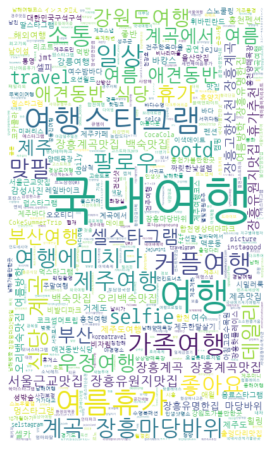

In [14]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

mask2 = np.array(Image.open('korea.png'))

stopwords=set(STOPWORDS)
stopwords.add('said')


wordcloud = WordCloud(background_color="white", max_words=1000,
                      font_path='C:/Windows/Fonts/NanumGothicCoding.ttf',
                      width=800, height=800, mask = mask2, stopwords = STOPWORDS).generate(text)

wc = wordcloud.generate(string)

plt.figure(figsize=(10,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()